## Librerias

In [1]:
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
from glob import glob
import pandas as pd
import numpy as np
import geopandas as gpd
import os
import re

# Datos de dengue

In [2]:
entidades_federativas = {
    1: "Aguascalientes",
    2: "Baja California",
    3: "Baja California Sur",
    4: "Campeche",
    5: "Coahuila",
    6: "Colima",
    7: "Chiapas",
    8: "Chihuahua",
    9: "Ciudad de México",
    10: "Durango",
    11: "Guanajuato",
    12: "Guerrero",
    13: "Hidalgo",
    14: "Jalisco",
    15: "Estado de México",
    16: "Michoacán",
    17: "Morelos",
    18: "Nayarit",
    19: "Nuevo León",
    20: "Oaxaca",
    21: "Puebla",
    22: "Querétaro",
    23: "Quintana Roo",
    24: "San Luis Potosí",
    25: "Sinaloa",
    26: "Sonora",
    27: "Tabasco",
    28: "Tamaulipas",
    29: "Tlaxcala",
    30: "Veracruz",
    31: "Yucatán",
    32: "Zacatecas"
}

## Carga de datos

In [3]:
files_degue = glob('data/dengue/datos_abiertos_dengu*/*.csv')
files_degue

['data/dengue\\datos_abiertos_dengue_230323\\dengue_abierto.csv',
 'data/dengue\\datos_abiertos_dengue_291222\\dengue_abierto.csv',
 'data/dengue\\datos_abiertos_dengue_301221\\Datos abiertos dengue_301221.csv',
 'data/dengue\\datos_abiertos_dengue_311220\\Datos abiertos dengue_311220.csv']

In [4]:
dengue = pd.DataFrame()
for f in files_degue:
    df = pd.read_csv(f)
    print(df.shape)
    dengue = pd.concat([dengue, df], axis=0)
print(dengue.shape)
dengue.head()

(9439, 28)
(57730, 28)
(35413, 28)
(120239, 28)
(222821, 28)


,FECHA_ACTUALIZACION,ID_REGISTRO,SEXO,EDAD_ANOS,ENTIDAD_RES,MUNICIPIO_RES,HABLA_LENGUA_INDIG,INDIGENA,ENTIDAD_UM_NOTIF,MUNICIPIO_UM_NOTIF,...,INMUNOSUPR,CIRROSIS_HEPATICA,EMBARAZO,DEFUNCION,DICTAMEN,TOMA_MUESTRA,RESULTADO_PCR,ESTATUS_CASO,ENTIDAD_ASIG,MUNICIPIO_ASIG
0,2023-03-21,1007423,2,29,23,5,2,2,23,5,...,2,2,2,2,5.0,1,5,3,23,5
1,2023-03-21,1007433,2,25,27,4,2,2,27,4,...,2,2,2,2,5.0,1,5,3,27,4
2,2023-03-21,1007459,2,0,7,89,2,2,7,89,...,2,2,2,2,5.0,2,5,1,7,89
3,2023-03-21,1007452,2,41,12,22,2,2,12,22,...,2,2,2,2,5.0,2,5,1,12,22
4,2023-03-21,1007468,2,10,12,73,2,2,12,73,...,2,2,2,2,5.0,1,5,1,12,73


In [5]:
dengue['FECHA_SIGN_SINTOMAS'] = pd.to_datetime(dengue['FECHA_SIGN_SINTOMAS'], format='%Y-%m-%d')

In [6]:
dengue['ENTIDAD_RES'] = dengue['ENTIDAD_RES'].map(entidades_federativas)
dengue['ENTIDAD_UM_NOTIF'] = dengue['ENTIDAD_UM_NOTIF'].map(entidades_federativas)
dengue['ENTIDAD_ASIG'] = dengue['ENTIDAD_ASIG'].map(entidades_federativas)

In [7]:
dengue = dengue[dengue['ESTATUS_CASO'] != 3]
dengue

,FECHA_ACTUALIZACION,ID_REGISTRO,SEXO,EDAD_ANOS,ENTIDAD_RES,MUNICIPIO_RES,HABLA_LENGUA_INDIG,INDIGENA,ENTIDAD_UM_NOTIF,MUNICIPIO_UM_NOTIF,...,INMUNOSUPR,CIRROSIS_HEPATICA,EMBARAZO,DEFUNCION,DICTAMEN,TOMA_MUESTRA,RESULTADO_PCR,ESTATUS_CASO,ENTIDAD_ASIG,MUNICIPIO_ASIG
2,2023-03-21,1007459,2,0,Chiapas,89,2,2,Chiapas,89,...,2,2,2,2,5.0,2,5,1,Chiapas,89
3,2023-03-21,1007452,2,41,Guerrero,22,2,2,Guerrero,22,...,2,2,2,2,5.0,2,5,1,Guerrero,22
4,2023-03-21,1007468,2,10,Guerrero,73,2,2,Guerrero,73,...,2,2,2,2,5.0,1,5,1,Guerrero,73
6,2023-03-21,1007475,1,12,Yucatán,79,2,2,Yucatán,79,...,2,2,2,2,5.0,2,5,1,Yucatán,79
7,2023-03-21,1007462,1,12,Guerrero,35,2,2,Guerrero,35,...,2,2,2,2,5.0,1,5,2,Guerrero,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120234,2020-12-30,841970,1,40,Morelos,25,2,2,Morelos,12,...,2,2,2,2,5.0,1,5,1,Morelos,25
120235,2020-12-30,841973,2,53,Jalisco,97,2,2,Jalisco,98,...,2,2,2,2,5.0,2,5,1,Jalisco,97
120236,2020-12-30,841976,1,31,Nuevo León,4,2,2,Nuevo León,4,...,2,2,2,2,5.0,1,2,2,Nuevo León,4
120237,2020-12-30,841979,2,28,Nuevo León,6,2,2,Nuevo León,6,...,2,2,2,2,5.0,1,5,1,Nuevo León,6


### Dengue por entidad federativa

In [8]:
dengue.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'SEXO', 'EDAD_ANOS',
       'ENTIDAD_RES', 'MUNICIPIO_RES', 'HABLA_LENGUA_INDIG', 'INDIGENA',
       'ENTIDAD_UM_NOTIF', 'MUNICIPIO_UM_NOTIF', 'INSTITUCION_UM_NOTIF',
       'FECHA_SIGN_SINTOMAS', 'TIPO_PACIENTE', 'HEMORRAGICOS', 'DIABETES',
       'HIPERTENSION', 'ENFERMEDAD_ULC_PEPTICA', 'ENFERMEDAD_RENAL',
       'INMUNOSUPR', 'CIRROSIS_HEPATICA', 'EMBARAZO', 'DEFUNCION', 'DICTAMEN',
       'TOMA_MUESTRA', 'RESULTADO_PCR', 'ESTATUS_CASO', 'ENTIDAD_ASIG',
       'MUNICIPIO_ASIG'],
      dtype='object')

Se mantendrán los registros que sean DICTAMEN = 1 y 4, Confirmado y En estudio, respectivamente.

In [9]:
dengue = dengue[dengue['DICTAMEN'].isin([1,4])]

In [10]:
dengue['DICTAMEN'].unique()

array([4., 1.])

In [11]:
dengue.HEMORRAGICOS.unique()

array([2, 1], dtype=int64)

### Datos geograficos entidades federativas

In [12]:
mexico_ine = pd.read_csv('data/mexico_ent/INE_ENTIDAD_2020.CSV', encoding='latin-1')
mexico_ine = mexico_ine[['ENT', 'POBTOT']]
mexico_ine.rename(columns={'ENT': 'CVE_ENT'}, inplace=True)

In [13]:
mexico_ent = gpd.read_file('data/mexico_ent/00ent.shp')

In [14]:
mexico_ent['CVE_ENT'] = mexico_ent['CVE_ENT'].astype(int)
mexico_ent = mexico_ent.merge(mexico_ine, on='CVE_ENT')

In [15]:
df = dengue.groupby('ENTIDAD_RES').agg({'ENTIDAD_RES': 'count'})
df.rename(columns={'ENTIDAD_RES': 'CASOS'}, inplace=True)
df.reset_index(inplace=True)
df.rename(columns={'ENTIDAD_RES': 'NOMGEO'}, inplace=True)
df.shape

(25, 2)

In [16]:
mexico_ent = mexico_ent.merge(df, on='NOMGEO', how='left')
mexico_ent.head()

,CVEGEO,CVE_ENT,NOMGEO,geometry,POBTOT,CASOS
0,01,1,Aguascalientes,"POLYGON ((2470517.824 1155028.588, 2470552.248...",1425607,NaN
1,02,2,Baja California,"MULTIPOLYGON (((1313480.513 1831458.607, 13135...",3769020,2.0
2,03,3,Baja California Sur,"MULTIPOLYGON (((1694656.344 1227647.637, 16946...",798447,1.0
3,04,4,Campeche,"MULTIPOLYGON (((3544897.199 946994.621, 354491...",928363,3.0
4,05,5,Coahuila de Zaragoza,"POLYGON ((2469954.193 1978522.993, 2469982.807...",3146771,NaN


In [17]:
mexico_ent['DENSIDAD'] = mexico_ent['CASOS'] / mexico_ent['POBTOT'] * 100000
mexico_ent

,CVEGEO,CVE_ENT,NOMGEO,geometry,POBTOT,CASOS,DENSIDAD
0,01,1,Aguascalientes,"POLYGON ((2470517.824 1155028.588, 2470552.248...",1425607,NaN,NaN
1,02,2,Baja California,"MULTIPOLYGON (((1313480.513 1831458.607, 13135...",3769020,2.0,0.053064
2,03,3,Baja California Sur,"MULTIPOLYGON (((1694656.344 1227647.637, 16946...",798447,1.0,0.125243
3,04,4,Campeche,"MULTIPOLYGON (((3544897.199 946994.621, 354491...",928363,3.0,0.323149
4,05,5,Coahuila de Zaragoza,"POLYGON ((2469954.193 1978522.993, 2469982.807...",3146771,NaN,NaN
5,06,6,Colima,"MULTIPOLYGON (((1157633.318 768573.524, 115772...",731391,7.0,0.957080
6,07,7,Chiapas,"POLYGON ((3560747.319 695090.732, 3561146.749 ...",5543828,12.0,0.216457
7,08,8,Chihuahua,"POLYGON ((1961978.327 2201082.365, 1961978.967...",3741869,NaN,NaN
8,09,9,Ciudad de México,"POLYGON ((2802175.660 843326.718, 2801806.564 ...",9209944,1.0,0.010858
9,10,10,Durango,"POLYGON ((2107050.444 1641943.398, 2109767.526...",1832650,NaN,NaN


In [48]:
mexico_ent.sort_values('DENSIDAD', ascending=False)

,CVEGEO,CVE_ENT,NOMGEO,geometry,POBTOT,CASOS,DENSIDAD
17,26,26,Sonora,"MULTIPOLYGON (((1653626.132 1730623.054, 16535...",2944840,40,1.358308
16,25,25,Sinaloa,"MULTIPOLYGON (((2050677.490 1245244.569, 20506...",3026943,30,0.991099
9,18,18,Nayarit,"MULTIPOLYGON (((2161261.691 1008297.886, 21612...",1235456,12,0.971301
3,06,6,Colima,"MULTIPOLYGON (((1157633.318 768573.524, 115772...",731391,7,0.957080
8,17,17,Morelos,"POLYGON ((2808476.273 786837.160, 2808717.307 ...",1971520,17,0.862279
11,20,20,Oaxaca,"MULTIPOLYGON (((3120848.310 424036.022, 312086...",4132148,33,0.798616
6,12,12,Guerrero,"MULTIPOLYGON (((2723457.629 539108.729, 272355...",3540685,25,0.706078
7,14,14,Jalisco,"MULTIPOLYGON (((2204875.697 806482.707, 220488...",8348151,55,0.658829
18,27,27,Tabasco,"POLYGON ((3505128.113 767766.230, 3505134.996 ...",2402598,15,0.624324
19,28,28,Tamaulipas,"POLYGON ((2724530.125 1735179.945, 2724595.848...",3527735,16,0.453549


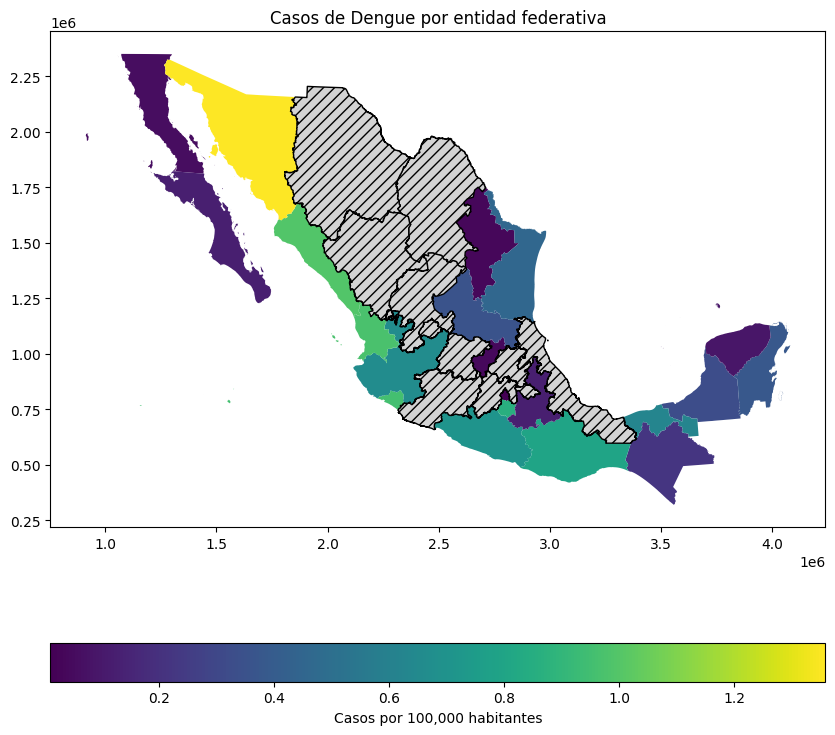

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

mexico_ent.plot(
  column='DENSIDAD', 
  ax=ax, 
  legend=True, 
  legend_kwds={'label': "Casos por 100,000 habitantes", 'orientation': "horizontal"},
  missing_kwds={"color": "lightgrey", "edgecolor": "black", "hatch": "///", "label": "Missing values"}
  )

plt.title('Casos de Dengue por entidad federativa')
plt.show()

### Municipios

## ERA5

In [43]:
era5 = pd.read_csv("data/ERA5/ERA5_Land_mean_values_2020_2023.csv")
era5.drop(columns=['system:index','.geo'], inplace=True)
era5.head()

,date,region_id,surface_net_solar_radiation,surface_pressure,temperature_2m,total_precipitation
0,2020-01-01,3,2.134247e+06,98701.231608,287.766367,0.002488
1,2020-01-01,4,3.509537e+06,100301.585572,298.268191,0.000305
2,2020-01-01,5,1.104217e+06,89380.675663,284.446624,0.000748
3,2020-01-01,6,3.107405e+06,95000.606587,294.771764,0.000271
4,2020-01-01,7,3.682448e+06,92870.038564,294.780402,0.000756


In [44]:
era5['region_id'] = era5['region_id'].replace(entidades_federativas)
era5.head()

,date,region_id,surface_net_solar_radiation,surface_pressure,temperature_2m,total_precipitation
0,2020-01-01,Baja California Sur,2.134247e+06,98701.231608,287.766367,0.002488
1,2020-01-01,Campeche,3.509537e+06,100301.585572,298.268191,0.000305
2,2020-01-01,Coahuila,1.104217e+06,89380.675663,284.446624,0.000748
3,2020-01-01,Colima,3.107405e+06,95000.606587,294.771764,0.000271
4,2020-01-01,Chiapas,3.682448e+06,92870.038564,294.780402,0.000756
